<a href="https://colab.research.google.com/github/karlacuv/MCD_Procesamiento/blob/main/Tarea6_Redes_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Convolucionales
### Karla Cureño Vega - 2085376

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Files/MCD/Procesamiento y Clasificación de Datos/Base Miniproyecto 2/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")

In [ ]:
# Importar los paquetes de keras y tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#Parametros que dependen de la capacidad computacional
INIT_LR = 0
BS = 16
EPOCHS = 20

Hg = 48
Lng = 48

In [ ]:
import glob
import tensorflow as tf
import numpy as np

angry = glob.glob('train/angry/*.*')
disgust = glob.glob('train/disgust/*.*')
fear = glob.glob('train/fear/*.*')
happy = glob.glob('train/happy/*.*')
neutral = glob.glob('train/neutral/*.*')
sad = glob.glob('train/sad/*.*')
surprise = glob.glob('train/surprise/*.*')
data = []
labels = []
for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fear:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Fear')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprise:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Surprise')
train_data = np.array(data)
train_labels = np.array(labels)
train_data.shape

(28709, 48, 48)

In [ ]:
# For test set

angry = glob.glob('test/angry/*.*')
disgust = glob.glob('test/disgust/*.*')
fear = glob.glob('test/fear/*.*')
happy = glob.glob('test/happy/*.*')
neutral = glob.glob('test/neutral/*.*')
sad = glob.glob('test/sad/*.*')
surprise = glob.glob('test/surprise/*.*')
data = []
labels = []
for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fear:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Fear')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprise:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Surprise')
test_data = np.array(data)
test_labels = np.array(labels)
test_data.shape

(7178, 48, 48)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X_train = train_data.astype('float32')
X_test = test_data.astype('float32')
X_train /= 255
X_test /= 255

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(train_labels))
y_test = np_utils.to_categorical(lb.fit_transform(test_labels))

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=20, 
                            zoom_range=0.15, 
                            width_shift_range=0.2,  
                            height_shift_range=0.2,
                             shear_range=0.15, 
                             horizontal_flip=True,
                             vertical_flip = True,
                             brightness_range=None,
                            zca_whitening=False,
                            zca_epsilon=1e-06,
                             fill_mode="nearest")

In [ ]:
#Start model Alexnet
model = Sequential()
model.add(Conv2D(16, (11, 11), input_shape=(Lng, Hg, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Layer 5
model.add(ZeroPadding2D((1, 1)))h
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 8
model.add(Dense(7))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [ ]:
X_train.shape

(28709, 48, 48)

In [ ]:
X_test

array([[[0.39215687, 0.3647059 , 0.36078432, ..., 0.7764706 ,
         0.7764706 , 0.7529412 ],
        [0.38039216, 0.36862746, 0.3647059 , ..., 0.7882353 ,
         0.78039217, 0.7647059 ],
        [0.4       , 0.37254903, 0.38039216, ..., 0.8039216 ,
         0.77254903, 0.7490196 ],
        ...,
        [0.4745098 , 0.4392157 , 0.41568628, ..., 0.69803923,
         0.6745098 , 0.6431373 ],
        [0.47058824, 0.44313726, 0.43529412, ..., 0.65882355,
         0.654902  , 0.6313726 ],
        [0.4862745 , 0.4627451 , 0.4392157 , ..., 0.6156863 ,
         0.6392157 , 0.6392157 ]],

       [[1.        , 0.99607843, 0.96862745, ..., 0.8745098 ,
         1.        , 0.9882353 ],
        [0.99607843, 1.        , 0.9647059 , ..., 0.8627451 ,
         0.99215686, 0.99607843],
        [0.99215686, 0.99215686, 0.972549  , ..., 0.8039216 ,
         0.99215686, 0.9882353 ],
        ...,
        [0.5921569 , 0.60784316, 0.5764706 , ..., 0.49411765,
         0.27058825, 0.23921569],
        [0.4

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adagrad', metrics=["acc"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5, restore_best_weights=True)
# Train 
history =model.fit(train_datagen.flow(X_train.reshape(28709, 48, 48, 1), y_train, batch_size=BS), 
                                    validation_data=(X_test.reshape(7178, 48, 48, 1), y_test), callbacks=[reduce_lr],
                                    epochs=100)

Epoch 1/100
1795/1795 [==============================] - 25s 13ms/step - loss: 1.1740 - acc: 0.5558 - val_loss: 1.0797 - val_acc: 0.5897 - lr: 0.0010
Epoch 2/100
1795/1795 [==============================] - 24s 14ms/step - loss: 1.1671 - acc: 0.5623 - val_loss: 1.0747 - val_acc: 0.5915 - lr: 0.0010
Epoch 3/100
1795/1795 [==============================] - 23s 13ms/step - loss: 1.1650 - acc: 0.5625 - val_loss: 1.0714 - val_acc: 0.5946 - lr: 0.0010
Epoch 4/100
1795/1795 [==============================] - 23s 13ms/step - loss: 1.1583 - acc: 0.5696 - val_loss: 1.0701 - val_acc: 0.5950 - lr: 0.0010
Epoch 5/100
1795/1795 [==============================] - 23s 13ms/step - loss: 1.1554 - acc: 0.5681 - val_loss: 1.0703 - val_acc: 0.5956 - lr: 0.0010
Epoch 6/100
1795/1795 [==============================] - 23s 13ms/step - loss: 1.1618 - acc: 0.5656 - val_loss: 1.0691 - val_acc: 0.5946 - lr: 0.0010
Epoch 7/100
1795/1795 [==============================] - 25s 14ms/step - loss: 1.1626 - acc: 0.5659 

In [ ]:
predictions = model.predict(X_test, batch_size=BS)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))
model.save('Model_7.0_Adam.h5')

              precision    recall  f1-score   support

       Angry       0.48      0.53      0.51       958
     Disgust       0.50      0.10      0.17       111
        Fear       0.47      0.25      0.32      1024
       Happy       0.81      0.85      0.83      1774
     Neutral       0.50      0.67      0.57      1233
         Sad       0.46      0.43      0.45      1247
    Surprise       0.70      0.76      0.73       831

    accuracy                           0.59      7178
   macro avg       0.56      0.51      0.51      7178
weighted avg       0.59      0.59      0.58      7178



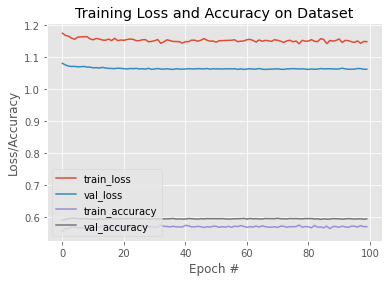

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot 

%matplotlib inline
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["acc"], label="train_accuracy")
plt.plot(N, history.history["val_acc"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt

### Conclusiones por Integrante:

Abril: Lectura de todas las imágenes en escala de grises con 1000 lotes de tamaño 16 cada uno, 30 epochs, y con optimizador Nadam. La red tiene 4 capas de convolución y un total de 1,217,847 parámetros. Tardó un promedio de 150 segundos por epoch, lo que suma un aproximado de 1 hr 10 minutos en ejecutarse. Se utilizó un EarlyStopping con paciencia de 3 monitoreando la función de pérdida del set de validación pero el modelo terminó las 30 epochs. El accuracy final en el set de validación es de 51%. Se observa que la red se desempeña pobremente alcanzando poco más del 50% de accuracy, lo que significa una probabilidad de 1/2 de obtener un resultado correcto. Para obtener un mejor resultado, se propone hacer la red más densa con una arquitectura más robusta que permita extraer mejor las características de las imágenes.

Karla: Lectura de todas las imágenes en escala de grises con 1795 lotes de tamaño 16 cada uno, 100 epochs, y con optimizador Adagrat. La red tiene 5 capas de convolución. Tardó un promedio de 23 segundos por epoch, lo que suma un aproximado de 41 minutos en ejecutarse. Se utilizó un EarlyStopping con paciencia de 5 monitoreando la función de pérdida del set de validación pero el modelo terminó las 30 epochs. El accuracy final en el set de validación es de 59%. En este caso, pese a que la exactitud del modelo mejoró 8 puntos porcentuales del modelo anterior y el tiempo de ejecución mejoró 30 minutos, aún se encuentra muy por debajo de las métricas esperadas.

Kin: Lectura de todas las imágenes en escala de grises con 448 lotes de tamaño 64 cada uno, 60 epochs y con optimizador Adam. La red tiene 4 capas de convolución y un total de 32,116,743 parámetros. Tardó un promedio de 800 segundos por epoch, lo que suma un aproximado de 13 horas en ejecutarse. No se utilizó EarlyStopping. El accuracy final en el set de validación es de 66%. Este último modelo es el más robusto que tardó más tiempo en ejecutarse y a su vez el que ha dado mejores resultados. La exactitud es aceptable considerando que se trata de clasificación de imágenes con 7 clases y ya se tiene una certeza de 66% de obtener resultados correctos.

En los tres casos se usó la función de pérdida de "categorical crossentropy" y una función de activación en la última capa de "softmax" debido a la naturaleza del problema.